# Introduction to Problem 
This dataset looks into how the student's performance (test scores) is affected by other variables such as gender, ethnicity, parental level of education, lunch and test preparation course. The dataset is organized into 8 columns and 1,000 rows. 




The quesitons I am looking to answer:
1. Do students with parents who have a higher education level perform better in all subjects or just specific ones?

2. What combination of factors (e.g., gender + parental education level + test prep course) leads to the highest/lowest scores?

3. Do students from different ethnic groups have significantly different test scores?




# Introduce the Data 

Introduce the Data
Here is the Dataset: https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance/data

This dataset contains information on students’ academic performance in various subjects, along with demographic and socio-economic factors. The goal is to analyze how different factors, such as parental education and test preparation, influence student performance.

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,- high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score


The purpose of this is to understand the influence of the parent's background, test preparation etc on students' performance.

- To start, I made sure to install and import the necessary libraries for this project.


In [19]:
!pip install numpy pandas matplotlib seaborn
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns



This step is for uploaded the csv files so that we can create our dataframe. 


In [15]:
file_path = r"/Users/bitaghaffari/Desktop/Data Mining/study_performance.csv"
df = pd.read_csv(file_path)

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Pre-Processing Steps (Cleaning) 
- The to_numeric() function with errors='coerce' will turn any non-numeric values into NaN.
- We need to check for missing values and duplicates with .isnull().sum() and .duplicated().sum() respectively.
- This handles missing values, duplicates, and ensure proper data types.

In [125]:
df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')
df['reading_score'] = pd.to_numeric(df['reading_score'], errors='coerce')
df['writing_score'] = pd.to_numeric(df['writing_score'], errors='coerce')

print(df.isnull().sum())

print(df.duplicated().sum())

df = df.drop_duplicates()

print(df.dtypes)




gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64
0
gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object


# Impact of Parental Education on Student Test Scores
To analyze the influence of parental education on student performance, we organized the data from least to most educated. The results show a clear upward trend: as parental education levels increase, students tend to achieve higher average scores in math, reading, and writing.

# Key Observations:
- Lower Education, Lower Scores: Students whose parents have "some high school" or only a "high school" education tend to score lower on average across all subjects. The lowest scores appear in the "high school" category, slightly below "some high school."
  
- College and Associate's Degree Impact: A noticeable improvement in scores occurs when parents have "some college" or an "associate's degree," indicating that even partial higher education has a positive influence on student performance.

  
- Bachelor’s and Master’s Degree Advantage: The highest scores are observed among students whose parents have a bachelor’s or master’s degree. In particular, students with parents holding a master’s degree score the highest across all subjects, with an average reading and writing score exceeding 75.


# Interpretation:
- The data suggests a strong correlation between parental education and student achievement.

In [104]:
education_order = [
    "some high school", 
    "high school", 
    "some college", 
    "associate's degree", 
    "bachelor's degree", 
    "master's degree"
]

# Group by parental education level and calculate mean scores
education_group = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean()

# Reorder the DataFrame based on the defined order
education_group = education_group.reindex(education_order)

# Display the output
print(education_group)


                             math_score  reading_score  writing_score
parental_level_of_education                                          
some high school              63.497207      66.938547      64.888268
high school                   62.137755      64.704082      62.448980
some college                  67.128319      69.460177      68.840708
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
master's degree               69.745763      75.372881      75.677966


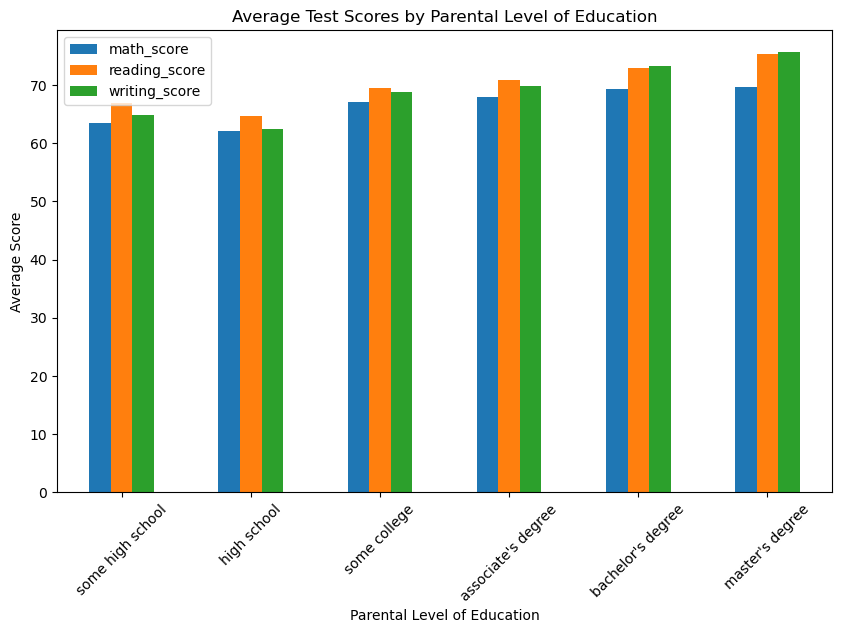

In [31]:
education_order = [
    "some high school", 
    "high school", 
    "some college", 
    "associate's degree", 
    "bachelor's degree", 
    "master's degree"
]

# Group by parental education level and calculate mean scores
education_group = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean()

# Reorder the DataFrame based on the defined order
education_group = education_group.reindex(education_order)

# Plot the results
education_group.plot(kind='bar', figsize=(10, 6))
plt.title('Average Test Scores by Parental Level of Education')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


# Impact of Gender, Parental Education, and Test Preparation on Test Scores
To analyze which combination of gender, parental education level, and test preparation course leads to the highest and lowest test scores, we computed the mean scores for each combination. The results highlight significant trends in student performance based on these factors.


# Key Findings

- Best-Performing Group: Female students with parents holding a bachelor’s or master’s degree who completed the test preparation course achieved the highest scores.
Specifically, females with a bachelor’s degree parent and test prep completed scored:
  - Math: 71.00
  - Reading: 80.68
  - Writing: 83.00
- Similarly, females with a master's degree parent and test prep completed scored even higher in reading (81.29) and writing (82.79).


- Worst-Performing Group: Male students with parents having only some high school education who did not complete the test prep course scored the lowest. Specifically, their average scores were:
  - Math: 66.70
  - Reading: 62.02
  - Writing: 57.07


- Key Takeaways & Interpretation
  - Parental education correlates with student performance. Higher parental education levels tend to result in better test scores.
  - Test preparation courses are effective and provide a measurable boost in performance across all demographics.
  - Females generally outperform males, specifically in reading and writing. The gender gap is more pronounced in these subjects.
  - The worst-performing students are those with low parental education who did not take the test preparation course.

In [45]:
# Group by gender, parental education level, and test preparation course
grouped_data = df.groupby(['gender', 'parental_level_of_education', 'test_preparation_course'])[['math_score', 'reading_score', 'writing_score']].mean()

print(grouped_data)


                                                            math_score  \
gender parental_level_of_education test_preparation_course               
female associate's degree          completed                 70.047619   
                                   none                      62.527027   
       bachelor's degree           completed                 71.000000   
                                   none                      66.926829   
       high school                 completed                 61.896552   
                                   none                      58.215385   
       master's degree             completed                 69.857143   
                                   none                      64.363636   
       some college                completed                 67.928571   
                                   none                      64.013158   
       some high school            completed                 63.828571   
                                   non

In [53]:
# Find the combination of factors that lead to the highest and lowest average math scores
highest_scores = grouped_data.loc[grouped_data['math_score'].idxmax()]
lowest_scores = grouped_data.loc[grouped_data['math_score'].idxmin()]

print("Combination leading to the highest math score:")
print(highest_scores)

print("\nCombination leading to the lowest math score:")
print(lowest_scores)

highest_reading = grouped_data.loc[grouped_data['reading_score'].idxmax()]
lowest_reading = grouped_data.loc[grouped_data['reading_score'].idxmin()]

# Highest and lowest for writing scores
highest_writing = grouped_data.loc[grouped_data['writing_score'].idxmax()]
lowest_writing = grouped_data.loc[grouped_data['writing_score'].idxmin()]

# Print results
print("\nCombination leading to the highest reading score:")
print(highest_reading)

print("\nCombination leading to the lowest reading score:")
print(lowest_reading)

print("\nCombination leading to the highest writing score:")
print(highest_writing)

print("\nCombination leading to the lowest writing score:")
print(lowest_writing)



Combination leading to the highest math score:
math_score       75.705882
reading_score    73.823529
writing_score    72.176471
Name: (male, master's degree, none), dtype: float64

Combination leading to the lowest math score:
math_score       56.464286
reading_score    65.464286
writing_score    63.785714
Name: (female, some high school, none), dtype: float64

Combination leading to the highest reading score:
math_score       69.857143
reading_score    81.285714
writing_score    82.785714
Name: (female, master's degree, completed), dtype: float64

Combination leading to the lowest reading score:
math_score       63.400000
reading_score    60.506667
writing_score    56.786667
Name: (male, high school, none), dtype: float64

Combination leading to the highest writing score:
math_score       71.000000
reading_score    80.681818
writing_score    83.000000
Name: (female, bachelor's degree, completed), dtype: float64

Combination leading to the lowest writing score:
math_score       63.4000

- Now we have our data lets put it in a graph to better understand and visualize 

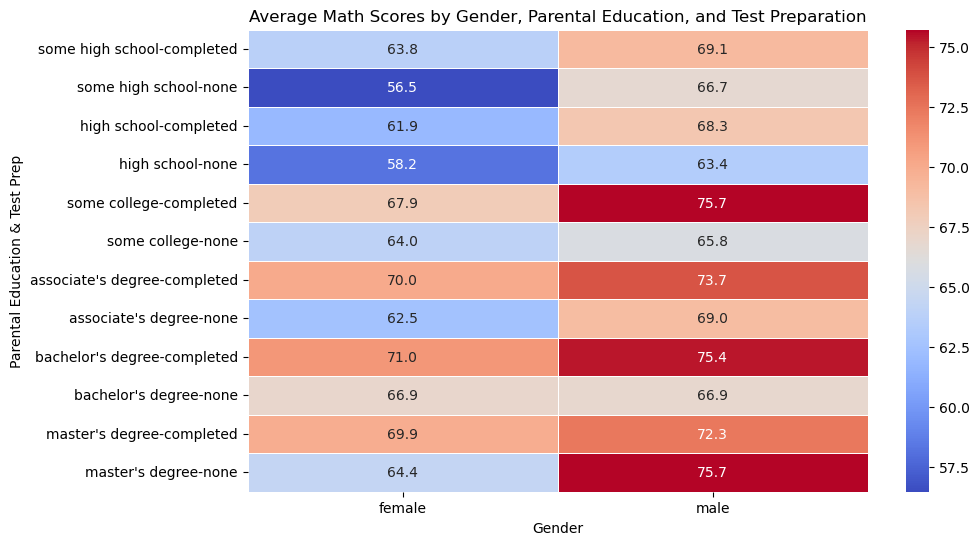

In [56]:
grouped_data = df.groupby(['gender', 'parental_level_of_education', 'test_preparation_course'])[['math_score', 'reading_score', 'writing_score']].mean().reset_index()

# Pivot table for visualization (focusing on math scores first)
pivot_data = grouped_data.pivot_table(values='math_score', index=['parental_level_of_education', 'test_preparation_course'], columns='gender')

# Sort the parental education levels in order
education_order = [
    "some high school", "high school", "some college",
    "associate's degree", "bachelor's degree", "master's degree"
]
pivot_data = pivot_data.reindex(education_order, level=0)

# Plot a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_data, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
plt.title('Average Math Scores by Gender, Parental Education, and Test Preparation')
plt.xlabel('Gender')
plt.ylabel('Parental Education & Test Prep')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

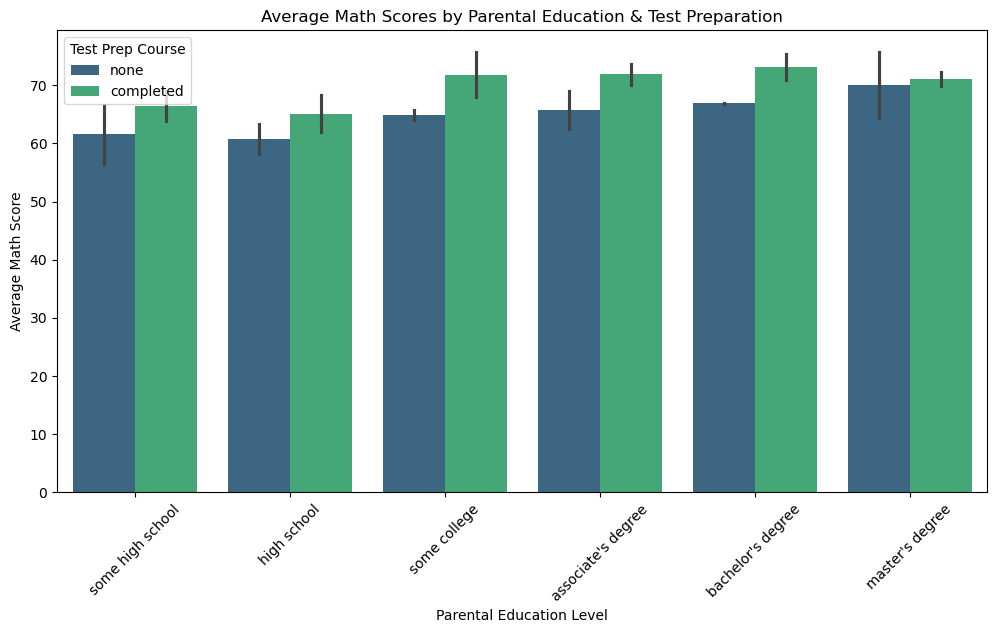

In [58]:
grouped_data = df.groupby(['gender', 'parental_level_of_education', 'test_preparation_course'])[['math_score', 'reading_score', 'writing_score']].mean().reset_index()

# Sort parental education levels from least to most educated
education_order = [
    "some high school", "high school", "some college",
    "associate's degree", "bachelor's degree", "master's degree"
]
grouped_data['parental_level_of_education'] = pd.Categorical(grouped_data['parental_level_of_education'], categories=education_order, ordered=True)
grouped_data = grouped_data.sort_values('parental_level_of_education')

# Plot the grouped bar chart
plt.figure(figsize=(12,6))
sns.barplot(
    data=grouped_data, 
    x='parental_level_of_education', 
    y='math_score', 
    hue='test_preparation_course', 
    palette='viridis'
)
plt.title('Average Math Scores by Parental Education & Test Preparation')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Math Score')
plt.xticks(rotation=45)
plt.legend(title='Test Prep Course', loc='upper left')
plt.show()

# Does Race/Ethnicity Impact Test Scores?
- To investigate whether race/ethnicity influences student test scores, we calculated the mean math, reading, and writing scores for each ethnic group and visualized the results. 

# Findings 
- Group A has the lowest average scores across all subjects (Math: 61.63, Reading: 64.67, Writing: 62.67).
- Group E has the highest scores in all subjects (Math: 73.82, Reading: 73.03, Writing: 71.41).
There is a clear upward trend in scores from Group A to Group E

# Interpretation of Results 
- The data suggests that students from different ethnic groups perform differently on standardized tests.
- Since all subject scores follow a similar pattern across groups, it indicates that these differences are consistent across different academic areas.
- The visualization reinforces this trend, showing a steady increase in test scores from Group A to Group E.


In [99]:
# Group by race/ethnicity and calculate mean scores
ethnicity_group = df.groupby('race_ethnicity')[['math_score', 'reading_score', 'writing_score']].mean()

# Print the grouped data
print(ethnicity_group)


                math_score  reading_score  writing_score
race_ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143


<Figure size 1200x600 with 0 Axes>

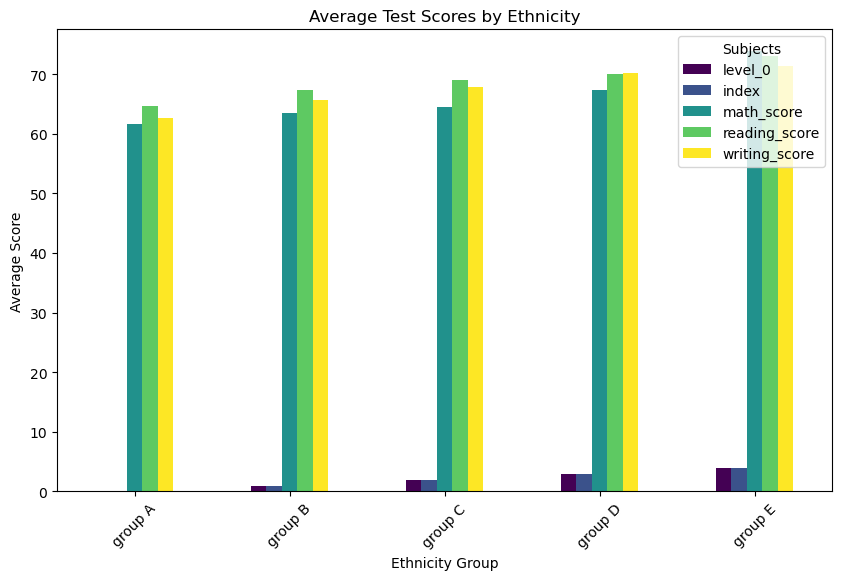

In [86]:
if 'level_0' in ethnicity_group.columns:
    ethnicity_group = ethnicity_group.drop(columns=['level_0'])

ethnicity_group = ethnicity_group.reset_index()
plt.figure(figsize=(12,6))
ethnicity_group.plot(x='race_ethnicity', kind='bar', figsize=(10,6), colormap='viridis')

plt.title('Average Test Scores by Ethnicity')
plt.xlabel('Ethnicity Group')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='Subjects')

plt.show()



# ANOVA (Analysis of Variance) 
is a statistical method used to determine whether there are significant differences in the means of two or more groups. In this case, we are analyzing whether test scores vary significantly across different ethnic groups.

# How ANOVA Works:
 -  evaluates whether at least one group’s mean differs from the others.
 - A small p-value (typically < 0.05) indicates a statistically significant difference, meaning that test scores are likely influenced by     ethnicity rather than random variation.
 - Downside: ANOVA does not specify which groups differ from each other—it only tells us that at least one group is significantly different.

In [88]:
from scipy.stats import f_oneway

# Perform ANOVA test
anova_math = f_oneway(*[df[df['race_ethnicity'] == group]['math_score'] for group in df['race_ethnicity'].unique()])
anova_reading = f_oneway(*[df[df['race_ethnicity'] == group]['reading_score'] for group in df['race_ethnicity'].unique()])
anova_writing = f_oneway(*[df[df['race_ethnicity'] == group]['writing_score'] for group in df['race_ethnicity'].unique()])

# Print the p-values
print(f"ANOVA Math p-value: {anova_math.pvalue}")
print(f"ANOVA Reading p-value: {anova_reading.pvalue}")
print(f"ANOVA Writing p-value: {anova_writing.pvalue}")


ANOVA Math p-value: 1.3732194030370688e-11
ANOVA Reading p-value: 0.0001780089103235947
ANOVA Writing p-value: 1.0979189070067382e-05


- Since all p-values are much smaller than 0.05. This means that students from different ethnic backgrounds do have significantly different test scores in math, reading, and writing.

# Storytelling
I was initially drawn to this dataset because I have always wondered whether factors beyond a student’s control—such as parental education, gender, and access to test preparation—play a significant role in academic test taking. Growing up, I believed that a student's success in school was largely shaped by their environment. If a student had well-educated parents, they will perform better acedemically. Also accounting for resources, encouragement, and higher expectations that could either motivate them or pressure them into performing well.

To explore this, I analyzed how parental education impacts student test scores and then expanded the scope to examine gender and test preparation as additional factors.

 - Parental Education: A Small but Noticeable Impact
The data confirmed my initial assumption that students with higher-educated parents tend to score slightly better. However, the impact is not large enough to claim significant influence.

 -  Students whose parents had a master’s degree performed best, with average math, reading, and writing scores all above 69.
Those whose parents had only some high school education scored the lowest, averaging in the low-to-mid 60s across all subjects.
While the trend suggests higher education correlates with better scores, the difference between students at the highest and lowest ends is less than 10 points on average, making it not a drastic gap.



# The Biggest Factor: Test Preparation
- One of the most striking insights was the clear benefit of test preparation courses.

  - Students who completed the course consistently outperformed their peers—regardless of gender or parental education.
  - The difference was particularly noticeable in reading and writing scores, where students who prepared scored 5–10 points higher on average.
   - This suggests that while environmental factors matter, proactive test preparation may be the most accessible and effective way to improve performance.

# Conclusions: What Really Matters?
- Reflecting on these findings, I realize that while parental education does have an influence, it is not the sole determinant of success. Instead, the most significant factor appears to be preparation and effort.

- Test preparation is one of the strongest predictors of success. This suggests that regardless of background, students who put in extra effort and take advantage of available resources can significantly improve their performance.
- Gender differences in performance suggest natural tendencies in subject strengths, but they are not barriers to success. With proper preparation, any student can excel in any subject.

- This analysis has answered my initial questions and even shifted my perspective. While I once believed that environment largely determines success, the data suggests that preparation and effort may be even more crucial factors. This insight is both hopeful and empowering because it means that students have the ability to shape their academic outcomes, regardless of their background.



# Impact section 
- While this analysis provides valuable insights into factors influencing student performance, it is important to acknowledge its limitations and potential impacts.

- Possible Harms & Ethical Considerations
  - Reinforcing Stereotypes: If misinterpreted, this analysis could reinforce harmful stereotypes. For example, that students with less- educated parents will perform worse or that certain genders are better at specific subjects.


   - If policymakers only focus on test preparation as the primary solution, it may overlook deeper systemic issues, such as school quality and curriculum disparities.Without addressing educational inequalities, test prep alone may not be a fair way to close achievement gaps.
 
   - Research conducted at the NIH (National Library of Medicine) concluded that children from lower socioeconomic status families have shown lower initial achievement and a slower growth rate across many studies.
 
   - Data Limitations:
This dataset focuses on measurable academic performance (math, reading, writing scores), but there are so many other important factors that could influence a students performance. Some examples include:
 
  -  Mental health and well-being: Stress, anxiety, and overall mental health can impact test scores but are not accounted for in this dataset.
  -  Extracurricular involvement: Activities like sports, music, and clubs contribute to cognitive and social development but are not included in the data.
  -  Teacher and classroom environment: The dataset does not capture the impacts of differentteaching methods or levels of classroom engagement and peer influence which are crucial to academic success. 



# References 


- https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance/data
- https://soeonline.american.edu/blog/effects-of-standardized-testing/
- https://owlcation.com/academia/Factors-That-Affect-Students-Test-Scores
- https://pmc.ncbi.nlm.nih.gov/articles/PMC7560977/
- https://pmc.ncbi.nlm.nih.gov/articles/PMC2853053/
- https://www.educationnext.org/how-family-background-influences-student-achievement/
- https://www.nber.org/digest/apr03/eating-your-way-higher-test-scores